<a href="https://colab.research.google.com/github/eduwalkerbr/rna_reconhecimento_imagens/blob/main/rna_rec_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of learning is reached


<Figure size 432x288 with 0 Axes>

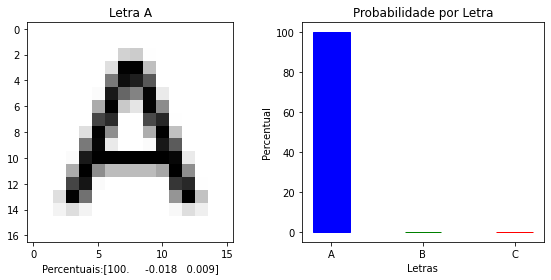

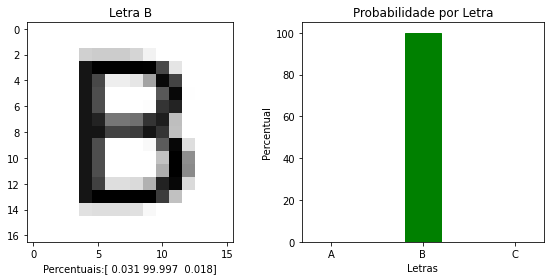

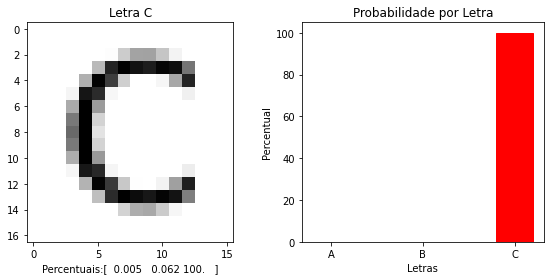

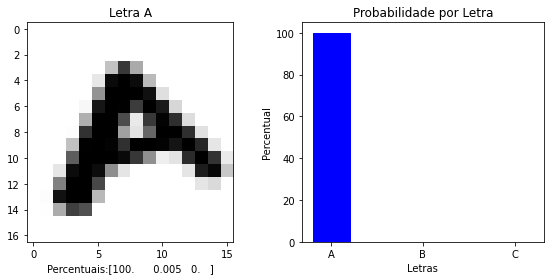

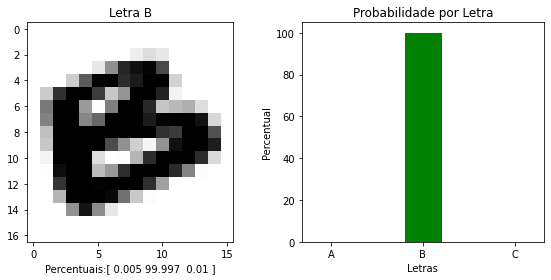

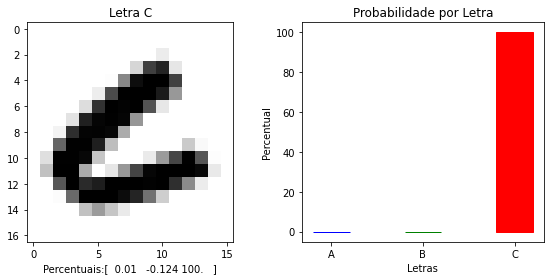

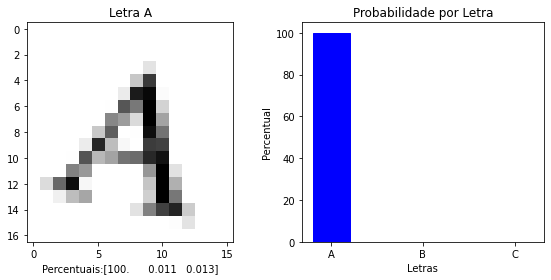

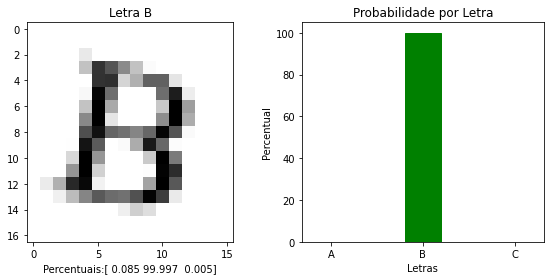

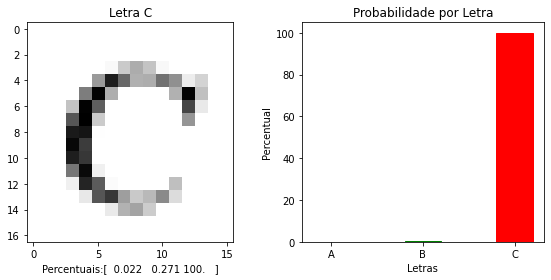

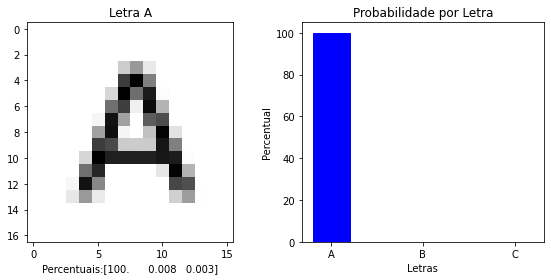

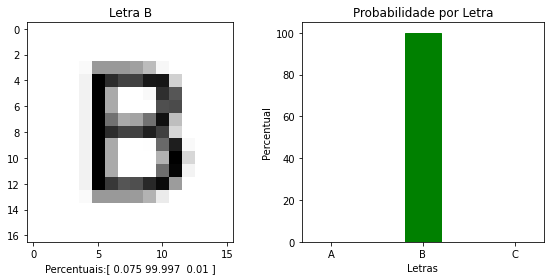

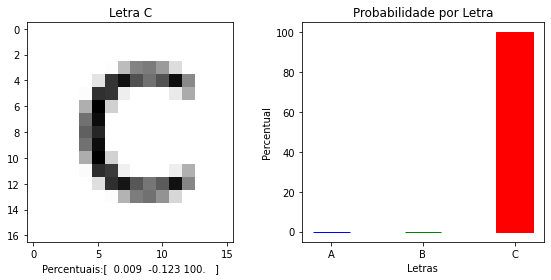

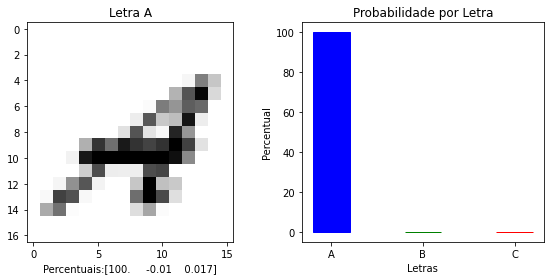

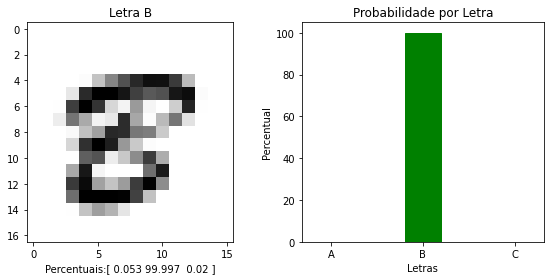

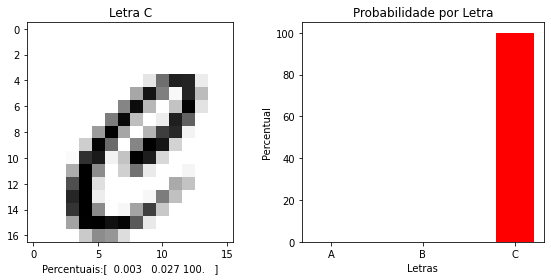

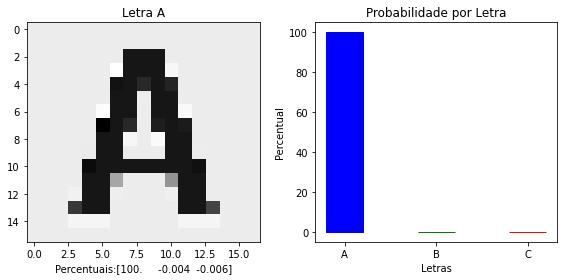

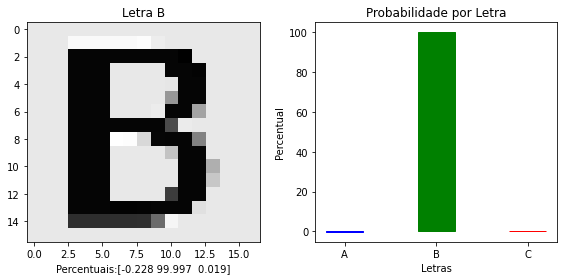

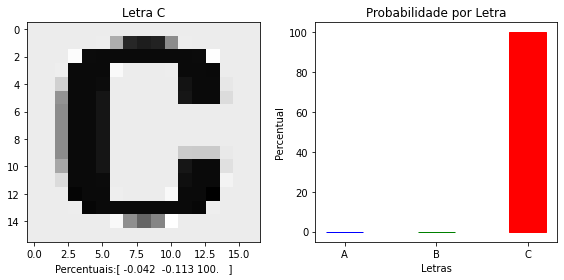

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
!pip install neurolab
import neurolab as nl

np. set_printoptions(suppress=True) #suprime mostrar em notação científica
imageModel=plt.imread("A1.png") # carrega a imagem em uma matriz
imageModel=np.mean(imageModel, 2) #transforma em escala de cinza

conteudoImage=np.zeros([18,imageModel.shape[0]*imageModel.shape[1]]) #cria matriz x das entradas

i1=0 #contador das linhas
figs=[] #figuras para serem mostradas
labelImage=np.zeros([18,3]) #saídas do treinamento

identificador = {'A': [1,0,0], 'B': [0,1,0], 'C': [0,0,1]}

for i in range(6): #cada amostra
  for letra in identificador.keys(): #de cada letra
    im=plt.imread(letra+str(i+1)+".png") #carrega a imagem em uma matriz

    #Caso a dimensão da imagem seja diferente da padrão, redimensiona
    if(im.shape[0] != 17 or im.shape[1] != 16):
      im = cv2.resize(im, dsize=(17, 16), interpolation=cv2.INTER_CUBIC)

    im=np.mean(im, -1) #escala de cinza
    figs.append(im) #adiciona nas imagens para mostrar depois
    conteudoImage[i1,:]=im.reshape([1,conteudoImage.shape[1]]) #coloca o conteúdo da matriz da imagem dentro da linha do x
    labelImage[i1,:] = identificador.get(letra)
    i1+=1

#define as entradas da rede neural
entradas=[]
for i in range(conteudoImage.shape[1]):
  entradas.append([0.0,1.0])

camada_oculta=8 #define uma camada oculta com 8 neuronios
saidas=3 #define quantidade de saídas

#cria a rede neural
net = nl.net.newff(entradas,[camada_oculta, saidas])

# Treina a rede neural
erro = net.train(conteudoImage, labelImage, epochs=10000, show=100, goal=0.00001)

#simula a rede neural
result_sim = net.sim(conteudoImage)

plt.gray() #paleta de escala cinza
for i in range(18): #para cada exemplo

  #gera um grid para exibir dois itens por linha
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

  #mostra o gráfico
  axes[0].imshow(figs[i]);
  axes[0].set_title("Letra " + list(identificador.keys())[np.argmax(result_sim[i,:])]);
  axes[0].set_xlabel("Percentuais:" + str(np.round((result_sim[i,:]*100),decimals=3)));

  #mostra o gráfico das probabilidades
  axes[1].set_title('Probabilidade por Letra');
  axes[1].set_xlabel('Letras');
  axes[1].set_ylabel('Percentual');
  axes[1].bar(['A','B','C'], np.round(result_sim[i,:]*100, decimals=2), 0.4);
  axes[1].get_children()[0].set_color('b') 
  axes[1].get_children()[1].set_color('g') 
  axes[1].get_children()[2].set_color('r') 
  fig.tight_layout()



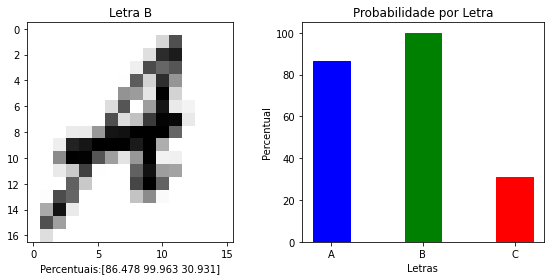

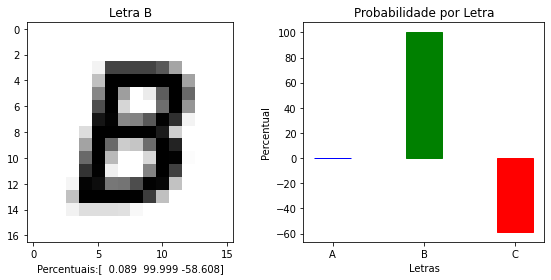

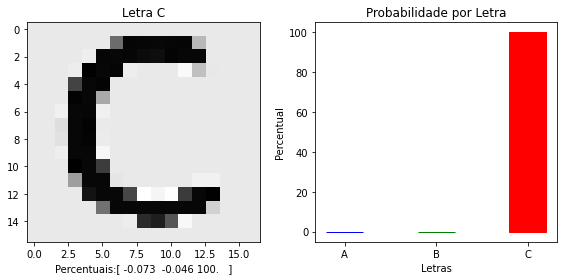

In [3]:
#cria matriz x2 de teste
conteudoImage2=np.zeros([3,imageModel.shape[0]*imageModel.shape[1]])
i1=0
figs2=[]

#Adiciona as imagens de teste
for i in range(3):
  image=plt.imread("Teste" + str(i+1) + ".png") #carrega imagem

  #Caso a dimensão da imagem seja diferente da padrão, redimensiona
  if(image.shape[0] != 17 or image.shape[1] != 16):
    image = cv2.resize(image, dsize=(17, 16), interpolation=cv2.INTER_CUBIC)

  image=np.mean(image, -1); #escala de cinza
  figs2.append(image); #adiciona na lista de figuras
  conteudoImage2[i1,:]=image.reshape([1,conteudoImage2.shape[1]]) #adiciona na matriz x
  i1+=1

#simula a rede neural
result_sim2 = net.sim(conteudoImage2)

#mostra as imagens e o resultado da RNA
for i in range(3):

  #gera um grid para exibir dois itens por linha
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

  #mostra a imagem
  axes[0].imshow(figs2[i]);
  axes[0].set_title("Letra " + list(identificador.keys())[np.argmax(result_sim2[i,:])]);
  axes[0].set_xlabel("Percentuais:" + str(np.round((result_sim2[i,:]*100),decimals=3)));

  #mostra o gráfico das probabilidades
  axes[1].set_title('Probabilidade por Letra');
  axes[1].set_xlabel('Letras');
  axes[1].set_ylabel('Percentual');
  axes[1].bar(['A','B','C'], np.round(result_sim2[i,:]*100, decimals=2), 0.4);
  axes[1].get_children()[0].set_color('b') 
  axes[1].get_children()[1].set_color('g') 
  axes[1].get_children()[2].set_color('r') 
  fig.tight_layout()
